In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### 1. How many empty entries we have for each attributes (5%)?
- Ans: 除了description有570個empty entries，其他皆沒有empty entries

In [2]:
video_list=pd.read_csv("USvideos.csv")
print(video_list.isnull().sum())

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


### 2. What are the average values of "likes","dislikes","views","comment_count“ in 2017? (10%)
- Ans: 
    - likes: 47935.02
    - dislikes: 2991.04
    - views: 1.31$\times10^{6}$
    - comment_count: 5780.98

In [3]:
video_list=pd.read_csv("USvideos.csv")
video_list["publish_time"]=pd.to_datetime(video_list["publish_time"])
video_list=video_list.assign(publish_day=video_list.publish_time.dt.day,publish_month=video_list.publish_time.dt.month,publish_year=video_list.publish_time.dt.year)
mask = video_list["publish_year"]== 2017
mask_vl = video_list[mask]
print(mask_vl.groupby("publish_year").agg('mean')[['likes','dislikes','views','comment_count']])

                     likes     dislikes         views  comment_count
publish_year                                                        
2017          47935.029824  2991.047277  1.313908e+06    5780.985232


### 3. Plot the boxplot of #dislikes for each month in 2017. (10%)

<AxesSubplot:xlabel='publish_month', ylabel='dislikes'>

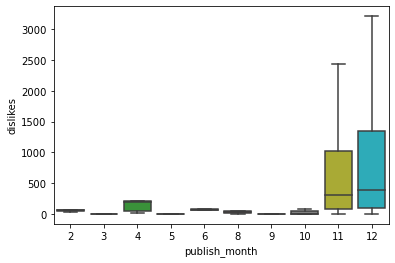

In [5]:
video_list=pd.read_csv("USvideos.csv")
video_list["publish_time"]=pd.to_datetime(video_list["publish_time"])
video_list=video_list.assign(publish_day=video_list.publish_time.dt.day,publish_month=video_list.publish_time.dt.month,publish_year=video_list.publish_time.dt.year)
# masking to get condition we want
mask = video_list["publish_year"]== 2017
mask_vl = video_list[mask]
# show boxplot, showfliers: remove outliers
sns.boxplot(x="publish_month",y="dislikes",data=mask_vl,showfliers=False)

### 4. Plot the histogram of #views for each category in 2017 and 2018 in one figure. (10%)

<AxesSubplot:xlabel='category_id', ylabel='views'>

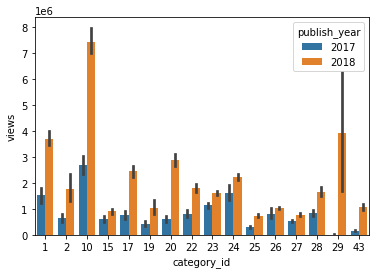

In [60]:
video_list=pd.read_csv("USvideos.csv")
video_list["publish_time"]=pd.to_datetime(video_list["publish_time"])
video_list=video_list.assign(publish_day=video_list.publish_time.dt.day,publish_month=video_list.publish_time.dt.month,publish_year=video_list.publish_time.dt.year)
# masking to get condition we want
mask = video_list["publish_year"] >= 2017
mask_v1 = video_list[mask]
sns.barplot(x="category_id",y="views",data=mask_v1,hue="publish_year")

### 5. Write a myPCA.py from scratch. (50%)

In [61]:
def myPCA(path,dim):
    # read file
    vl=pd.read_csv(path)
    # use 7 specific features to do PCA
    target = vl.iloc[:][['views','likes','dislikes','comment_count','comments_disabled','ratings_disabled','ratings_disabled','video_error_or_removed']]
    # drop NaN
    target.dropna()
    #
    target['comments_disabled'] =  target['comments_disabled'].astype(int)
    target['ratings_disabled'] = target['ratings_disabled'].astype(int)
    target['ratings_disabled'] = target['ratings_disabled'].astype(int)
    target['video_error_or_removed'] = target['video_error_or_removed'].astype(int)
    # standardization
    target = (target - np.nanmean(target)) / np.nanstd(target)
    # build covariance matrix of input matrix
    cov = target.cov()
    # get eigenvector of cov
    e_val, ev = np.linalg.eig(cov)
    # do PCA
    target_pca = np.dot(target,ev[:,0:dim])
    # standardization
    target_pca = (target_pca - np.nanmean(target_pca)) / np.nanstd(target_pca)
    return target_pca

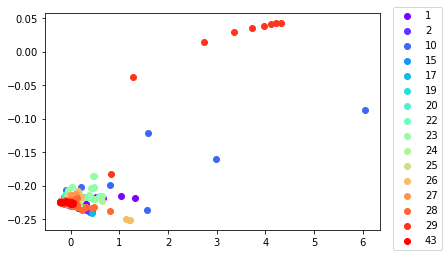

In [62]:
import matplotlib.cm as cm
# read file
vl=pd.read_csv("USvideos.csv")
# get PCA result
target_pca = myPCA("USvideos.csv",2)
# get 50 samples from each category
total_cnt = 0
Max = vl['category_id'].max() 
cnt_ary = [0]*(Max+1)
idx = 0;
ary = []
while(total_cnt < Max and idx < len(vl)):
    if(cnt_ary[vl['category_id'].iloc[idx]]<50):
        ary.append(idx)
    elif(cnt_ary[vl['category_id'].iloc[idx]]==50):
        total_cnt += 1
    cnt_ary[vl['category_id'].iloc[idx]] += 1
    idx+=1;
target_pca_samples = target_pca[ary]
label = vl.iloc[ary][['category_id']]
target_pca_samples = np.insert(target_pca_samples, 2, values=label.T,axis = 1)
target_pca_samples=target_pca_samples[target_pca_samples[:,2].argsort()]
# get colors for different category id
colors = cm.rainbow(np.linspace(0, 1, 16))
# plot the graph
for i in range(16):
    plt.scatter(target_pca_samples[i*50:(i+1)*50,0],target_pca_samples[i*50:(i+1)*50,1],marker='o',color=colors[i],label=int(target_pca_samples[i*50,2]))
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.show()

### 6. Plot the word cloud of “title”. (15%)

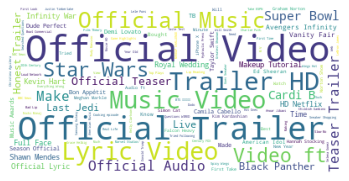

In [63]:
from wordcloud import WordCloud
video_list=pd.read_csv("USvideos.csv")
# Word segmentation
titles = video_list['title']
text = ''
for t in titles:
    text += t+' '
# Generation includes Count/Cutoff
wordcloud = WordCloud(background_color="white").generate(text)
# Visualization
plt.imshow(wordcloud)
plt.axis("off")
plt.show()